<a href="https://colab.research.google.com/github/Khrlumam31/MSIB-K2-KelasAwanPintar/blob/main/Self_Learning_pelabelan_dan_pembuatan_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan Data Exploration NLP**

NLP adalah cabang dari Artificial Intelligence yang berhubungan dengan interaksi antara mesin dan manusia menggunakan bahasa natural.

Eksplorasi data merupakan langkah untuk memahami data sebelum dilakukan praproses. Pemahaman terhadap data yang akan di-mining dapat membantu dalam menentukan teknik-teknik pra-proses dan analisis data terhadap data sebelum dilakukan data mining.

## **Import Library**

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


Import data
silahkan gunakan data yang sudah kalian ambil pada hari selasa, data berupa text yang diambil di twitter dengan topik tertentu

atau bisa gunakan data yang disediakan
[disini](https://drive.google.com/file/d/10sIjKMFBhBlp5W4zCWFwXDars2c7koyR/view?usp=sharing)


In [ ]:
tweet = pd.read_csv('/content/bjorka.csv')
tweet

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-09-20 12:21:02,b'@wiragaksableng @iya_althaf Hahahaha.. Sdkit...,0,0,1572199152418975746,InginBebas6
1,2022-09-20 12:20:48,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572199092926943232,Daaan_Daaann
2,2022-09-20 12:20:18,b'RT @MMargani5: Akibat GONJANG-GANJING Kasus ...,0,463,1572198968284839938,Tju_Lee
3,2022-09-20 12:20:09,"b'RT @HalimTeuku: Kata Bjorka bong: ""Saya Hack...",0,2,1572198930104078339,6undul0h
4,2022-09-20 12:19:51,b'RT @rekomendasihitz: pastel outfit idea \xf0...,0,79,1572198853146968064,lonjwinkiyowoo
...,...,...,...,...,...,...
2639,2022-09-20 03:58:51,"b'RT @6undul0h: Sebentar..., bjorka itu khan h...",0,44,1572072773035626496,1Agamano
2640,2022-09-20 03:58:34,b'RT @MMargani5: Akibat GONJANG-GANJING Kasus ...,0,463,1572072700314808324,iqbalkidd
2641,2022-09-20 03:58:28,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572072678261149701,manadiy
2642,2022-09-20 03:58:11,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572072606496600064,adila_shatir


In [ ]:
tweets = tweet.iloc[0:300,:]
tweets

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-09-20 12:21:02,b'@wiragaksableng @iya_althaf Hahahaha.. Sdkit...,0,0,1572199152418975746,InginBebas6
1,2022-09-20 12:20:48,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572199092926943232,Daaan_Daaann
2,2022-09-20 12:20:18,b'RT @MMargani5: Akibat GONJANG-GANJING Kasus ...,0,463,1572198968284839938,Tju_Lee
3,2022-09-20 12:20:09,"b'RT @HalimTeuku: Kata Bjorka bong: ""Saya Hack...",0,2,1572198930104078339,6undul0h
4,2022-09-20 12:19:51,b'RT @rekomendasihitz: pastel outfit idea \xf0...,0,79,1572198853146968064,lonjwinkiyowoo
...,...,...,...,...,...,...
295,2022-09-20 11:20:57,b'@bjorkanismreal Real kah bjorka',0,0,1572184032909365249,friendly685
296,2022-09-20 11:20:00,"b'""Halo nyonya, saya tidak punya banyak waktu ...",2,0,1572183791098941440,okezonenews
297,2022-09-20 11:19:59,b'RT @rekomendasihitz: pastel outfit idea \xf0...,0,79,1572183787228004355,racunterusguis
298,2022-09-20 11:19:58,b'RT @tubbirfess: Polisi nyari bjorka 1 bulan ...,0,590,1572183784312930304,tweetaje_aje


##Fungsi Preprocessing
Text preprocessing adalah suatu proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi dengan melalui serangkaian tahapan yang meliputi tahapan case folding, tokenizing, filtering dan stemming. Tapi, sesungguhnya tidak ada aturan pasti tentang setiap tahapan dalam text preprocessing. Semua itu tergantung dengan jenis serta kondisi data yang kita miliki. Text preprocessing merupakan salah satu implementasi dari text mining. Text mining sendiri adalah suatu kegiatan menambang data, dimana data yang biasanya diambil berupa text yang bersumber dari dokumen-dokumen yang memiliki goals untuk mencari kata kunci yang mewakili dari sekumpulan dokumen tersebut sehingga nantinya dapat dilakukan analisa hubungan antara dokumen-dokumen tersebut.

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'B|b', '', text)
    text = re.sub(r'xexxa', '', text)

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

##Download Punkt
Punkt dan stopword adalah corpus atau dataset yang disediakan oleh nltk yang akan banyak digunakan pada domain NLP

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

##Proses Preprocessing,
Tahap ini adalah menjalankan fungsi Preprocessing data kita

sebagai gambaran 4000 data sekitar 1.5 jam sabar ya

In [ ]:
# Assuming the 'isitweet' column is actually in the 'tweet' DataFrame.
# If 'isitweet' is a different column, replace it with the correct name.
tweet['text_clean'] = tweet['isitweet'].apply(cleaningText)
tweet['text_clean'] = tweet['text_clean'].apply(casefoldingText)
tweet.drop(['isitweet'], axis=1, inplace=True)  # drop the original tweet column

tweet['text_preprocessed'] = tweet['text_clean'].apply(tokenizingText)
tweet['text_preprocessed'] = tweet['text_preprocessed'].apply(filteringText)
tweet['text_preprocessed'] = tweet['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweet.drop_duplicates(subset='text_clean', inplace=True)

# Assign the modified DataFrame back to the 'tweets' variable if needed
tweets = tweet

## Menampilkan kalimat yang sudah di preprocessing

In [ ]:
tweets

,timetweet,favcount,retwcount,id,name,text_clean,text_preprocessed
0,2022-09-20 12:21:02,0,0,1572199152418975746,InginBebas6,althaf hahahaha sdkit pi lg ini sy ku pensiunk...,"[althaf, hahahaha, sdkit, pi, lg, sy, ku, pens..."
1,2022-09-20 12:20:48,0,1596,1572199092926943232,Daaan_Daaann,ndak gini juga cara mainnya omnndi eropa di si...,"[ndak, gin, main, omnndi, eropa, singapore, dl..."
2,2022-09-20 12:20:18,0,463,1572198968284839938,Tju_Lee,akiat gonjangganjing kasus samo amp jorka dll ...,"[akiat, gonjangganjing, samo, amp, jorka, dll,..."
3,2022-09-20 12:20:09,0,2,1572198930104078339,6undul0h,kata jorka ong saya hacker mau eli akun tele k...,"[jorka, ong, hacker, eli, akun, tele, isa, nnk..."
4,2022-09-20 12:19:51,0,79,1572198853146968064,lonjwinkiyowoo,pastel outfit idea xfxfxcxnnxexxthreadnnadam l...,"[pastel, outfit, idea, xfxfxcxnnxexxthreadnnad..."
...,...,...,...,...,...,...,...
2634,2022-09-20 03:59:18,1,0,1572072886256672768,Irfqn_,pak dedi ini ditanya singapura atau filipina a...,"[dedi, singapura, filipina, aja, ngang, ngong,..."
2636,2022-09-20 03:59:10,0,0,1572072854463877120,JuaraCoding,gimana hasil diskusi ya soat juaranndi part k...,"[gimana, hasil, diskusi, ya, soat, juaranndi, ..."
2637,2022-09-20 03:59:09,0,0,1572072850651250690,fuk_min,krn r jorka yg demo online pemerintah kalang a...,"[krn, r, jorka, yg, demo, online, perintah, ka..."
2638,2022-09-20 03:59:01,0,0,1572072814492143619,fourtyfiveradio,pria asal madiun dipulangkan setelah ditetapka...,"[pria, madiun, pulang, tetap, sangka, agian, r..."


## Labeling dengan lexicon
Pelabelan data adalah proses penambahan label ke data mentah untuk memberikan konteks atau makna pada data. Data berlabel kemudian digunakan untuk melatih model NLP untuk membuat prediksi atau memahami atau menghasilkan ucapan.

pelabelan kali ini menggunakan lexicon sebagai pelabelan secara otomatis. Dalam klasifikasi berbasis leksikon, dokumen diberi label dengan membandingkan jumlah kata yang muncul dari dua leksikon yang berlawanan, seperti sentimen positif dan negatif.

Sebelum menjalankan kode berikut silahkan download 2 file pendukung berikut:

[Negatif](https://drive.google.com/file/d/1UBLrxmfFTEg1t9rHw6v-M5pJVRDWuyFH/view?usp=sharing)

[Positif](https://drive.google.com/file/d/1JqpJ12JqiOMOJ5R0Gg4rz3Xbqe3j2-Om/view?usp=sharing)

[Referensi](https://github.com/fajri91/InSet)

In [ ]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file


polarity
negative    493
positive    263
neutral     248
Name: count, dtype: int64


## Visualisasi Hasil sentiment

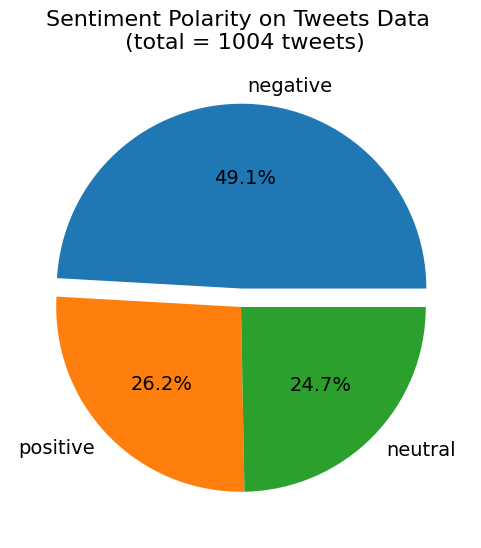

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title(f'Sentiment Polarity on Tweets Data \n (total = {len(tweets.index)} tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,wiiih mantap juga nih si acot ayo dong ongkar jangan ngemeng doang heat deh lu kalo isa ongkar id jorka isa dianugrahi pahlawan lu ama rezim ayo uktiin acotan lu,13,positive
2,masih heoh ae ieu jorka nu isa ngaajak akun pamarentah euh adeng eta f kula aheula diajak ku jorka nyah haha nntah ngomongxcx akun medsos kaka teteh pernah aya nu ngaajak teu eraha kali ganti akun komen amp req lagu pop di rg kang mudofar,11,positive
3,referensi one set ala korea checkna treadnnjorka ngeringeri sedap suho masih pagi fikri seulgi happy irthday my love sexexxa,10,positive
4,kata nenek orang yang suka meminta adalah orang yang tidak mampunyg mendukung kamu jorka adalah orang jahatnpnjahat yg punya akhlak rusak,9,positive
5,welcome onus casinonsegera join di sini ya osku n,9,positive
6,kalo isa ongkar masa lalu uruk para elit politik dan para artis tanah air yang ikut campur urusan kamu saya seagai masyarakat kecil mendukungmu xfxfxxafxfxfxxdxfxfxxd,9,positive
7,penetapan tersangka pada pemuda madiun dinilai tergesagesa persulit pencarian hacker jorka asli,8,positive
8,sekarang soat sudah tahu kan peredaan dari istilah hacker dan cracker jangan sampai ketuker lagi yannnah kalau gitu jorka itu hacker atau cracker ya tulis di kolom komentar pendapat soat pgncom ya,8,positive
9,terimakasih para penjaga nkrinnkeisya eko kuntadhi istana islam jorka,8,positive
10,natalienya yg suka sharing rl di akun alter xfxfxx klo jorka sharing apaan,8,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:20]

,text_clean,polarity_score,polarity
1,ngr nah iya harusnya s dialikin pisonya uat nyerang pemerintah kalau aja komunikasi kita ama si jorka s sejalan komunitas kecil ajaniarin jorka ool data priadi then sear tanpa emel jorka aru gerak masive uat demo menanyakan keocoran data dgn dasar pasal aru ini,-25,negative
2,perempuan terutama istri kalo nyium gelagat aneh lakinya isa leih serem dari jorka asal lu taunnsegala dulu selingkuhan lu pernah mencret gara makan rujak mangga hasil nyolong tetangganya juga akalan keongkarxfxfxaxa,-22,negative
3,pak menteri supaya kita masyarakat indonesia punya wiawa di mata dunia tolong jaga data priadi kami dan data priadi apak nhacker jorka hari ini menjadi idola aru di mata masyarakat karena merasa pemerintah gagal untuk melindungi data kami,-22,negative
4,satelit coa geovedi geser posisi jorka ke dekat maes polri spaya mudah ditangkap jorka masih eas erlehaleha memuktikan hacker indonesia yang memantu polri utk menangkapnya masih kalah level kejarlah jorka kau dijitak mana hacker putih lainnya,-21,negative
5,pemelaannya itu apa dia tau yg eli akun nya adalah jorke apa dia tau etul akunnya akan di pakai kejahatan kalau iya akun dia di pakai utk kejahatan yg mana kapan akun nya di eli apakah seelum jorka sudah mulai menyerang,-20,negative
6,mendinglah meski terlamat udah kejadian jorka aru pada sadar pentingnya uu ini krn keocoran data isa juga menimpa para legislator tipikal org kita anget kejadian dulu aru mikir,-19,negative
7,nikitalonte tau si jorkaxexxxefxxfnnayo dong polri periksa nikitalonte mana tau infonya enarnnsekalian tanyankapan siap masuk sel khan sudah menyandang status tersangka tuh nikitalonte,-19,negative
8,ku entuk tim atasi jorka hempas tudingan soal kemanan data cuma tupoksi nnpementukan tim khusus oleh presxexxa,-19,negative
9,salah satu tanda masih lemahnya tim cier pengaman negara masa tukang es yg di tagkap dengan alasan yg memantu jorka nggak logissnlangsung dong heckernya yg di tangkap percuma anak uahnya yg ditangkap terus osnya masih adanheeedeeeehhhh indonesia lemah,-19,negative
10,hacker lain ermain per orangan mereka saling kejar mengejar untuk mendapatkan pengakuan jorka odoh harus mencari sesuatu di negeri ini anenomy ermain tidak satu tempat dia akan mencari yg tempat leih esar tapi dia adalah alat yang dijadikan oleh seseorang untuk merusak,-18,negative


##Visualize word cloud
Word cloud merupakan salah satu metode untuk menampilkan data teks secara visual. Grafik ini populer dalam text mining karena mudah dipahami.

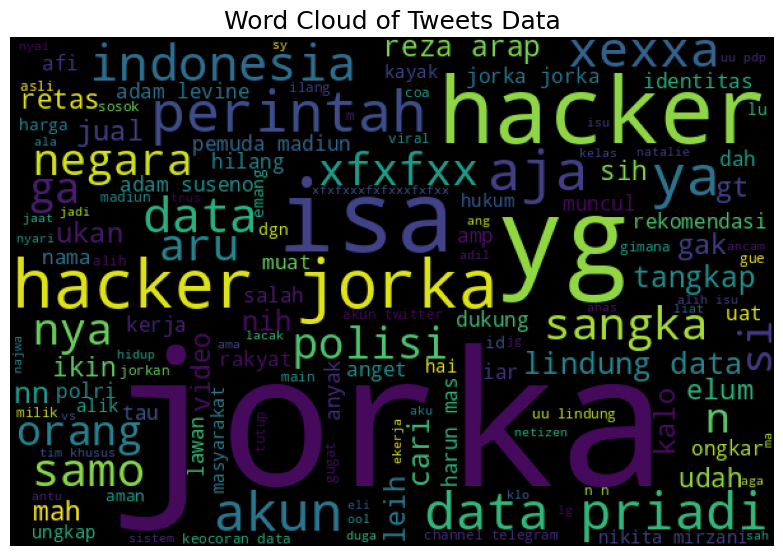

In [ ]:
# Visualize word cloud

list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

#Tugas
Silahkan kalian labeling data yang sudah di crawling pada hari ke 2 kemarin sebagai mini project!

kemudian simpan hasilnya dalam csv!

In [ ]:


import pandas as pd

# Define the recipe data
data = {
    "name": ["Nasi Liwet", "Karedok", "Lotek"],
    "description": [
        "Nasi liwet adalah nasi gurih khas Sunda yang dimasak dengan santan dan rempah, sering disajikan dengan ikan asin, ayam, dan sayuran.",
        "Karedok adalah salad sayuran khas Sunda dengan bumbu kacang yang segar dan pedas.",
        "Lotek adalah hidangan khas Sunda yang mirip dengan gado-gado, terdiri dari sayuran rebus yang disajikan dengan bumbu kacang."
    ],
    "ingredients": [
        "300 gram beras, 400 ml air, 200 ml santan, 1 batang serai, 2 lembar daun salam, 2 lembar daun jeruk, 1 sendok teh garam",
        "100 gram kacang panjang, 100 gram tauge, 50 gram kol, 1 buah mentimun, 5 lembar daun kemangi",
        "100 gram kacang panjang, 100 gram tauge, 50 gram kol, 100 gram bayam, 1 buah ketimun"
    ],
    "steps": [
        "Cuci beras hingga bersih. Masukkan beras, air, santan, serai, daun salam, daun jeruk, dan garam ke dalam rice cooker atau panci. Masak hingga nasi matang dan bumbu meresap. Setelah matang, angkat dan sajikan nasi liwet dengan lauk pendamping.",
        "Siapkan sayuran, cuci bersih dan tiriskan. Haluskan bumbu kacang, lalu campur dengan sayuran. Aduk rata dan sajikan.",
        "Rebus semua sayuran hingga setengah matang, lalu tiriskan. Haluskan bumbu kacang, campurkan dengan sayuran rebus. Sajikan lotek dengan tambahan lontong atau ketupat jika diinginkan."
    ],
    "bumbu_kacang": [
        None,
        "100 gram kacang tanah, 3 siung bawang putih, 5 buah cabai rawit merah, 2 cm kencur, 1 sendok teh gula merah, 1 sendok teh garam, 100 ml air matang",
        "100 gram kacang tanah, 3 siung bawang putih, 5 buah cabai merah, 1 sendok teh gula merah, 1 sendok teh garam, 100 ml air matang"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as CSV
df.to_csv('recipe_data.csv', index=False)
print("DataFrame saved to recipe_data.csv")

DataFrame saved to recipe_data.csv


NameError: name 'DataFrame' is not defined